## Charts with loss value depending on the epoch and Polynomial features

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
import numpy as np
from MyImplementations.SoftmaxRegression import SoftmaxRegression
from utils import (
    music_genre_clean_up,
    divide_dataframe,
    get_preprocessor
)

df = pd.read_csv('../data/music_genre.csv')
music_genre_clean_up(df)

df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,NaN,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,NaN,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


In [3]:
TARGET = 'music_genre'

X, y, num, cat = divide_dataframe(df, TARGET)

print(num)
print(cat)

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
['key', 'mode']


In [4]:
preprocessor = get_preprocessor(num, cat)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.preprocessing import PolynomialFeatures


def encode(y):
    label_encoder = LabelEncoder()
    y_int = label_encoder.fit_transform(y)
    y_one_hot = np.eye(len(np.unique(y)))[y_int]

    return y_one_hot

In [13]:
from sklearn.linear_model import LogisticRegression

degrees = [1, 2, 3]

for i in range(len(degrees)):
    log_reg = Pipeline([
        ('preprocssor', preprocessor),
        ('polynomial_features', PolynomialFeatures(degree=degrees[i])),
        ('model', LogisticRegression(random_state=42, max_iter=1000))
    ])

    log_reg.fit(X_train, y_train)

    print(f'Degree: {degrees[i]}')
    print('=' * 15)

    train_pred = log_reg.predict_proba(X_train)
    test_pred = log_reg.predict_proba(X_test)

    print(f'Train log_loss: {log_loss(encode(y_train), train_pred)}')
    print(f'Test log_loss: {log_loss(encode(y_test), test_pred)}')

    print('=' * 30)

Degree: 1
Train log_loss: 1.255760508744997
Test log_loss: 1.2614560202978353
Degree: 2
Train log_loss: 1.094807736965424
Test log_loss: 1.1573973823400119


C:\Users\wyskw\OneDrive\Pulpit\studia\sem4\MSID\laby\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Degree: 3
Train log_loss: 0.89007850009627
Test log_loss: 1.2948718002297444


- Degree 1 ok
- Degree 2 better
- Degree 3 overfitting

## Plotting train and test for My implementation

In [7]:
import matplotlib.pyplot as plt


def plot_loss_over_epoch(degree: str, train_losses, test_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(test_losses, label='Test Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title(f'Train and Test Log Loss over Epochs Degree: {degree}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
def get_losses(pipeline, epoches):

    train_losses = []
    test_losses = []

    for epoch in range(epoches):
        print(epoch, end=', ')

        pipeline.fit(X_train, y_train)

        train_losses.append(log_loss(encode(y_train), pipeline.predict_proba(X_train)))
        test_losses.append(log_loss(encode(y_test), pipeline.predict_proba(X_test)))

    return train_losses, test_losses


In [9]:
degrees = [1,2,3]
results = []

for i in range(len(degrees)):

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('polynomial_feature', PolynomialFeatures(degree=degrees[i])),
        ('model', SoftmaxRegression(epoches=1))
    ])

    results.append(get_losses(model, 100))
    print()



0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 

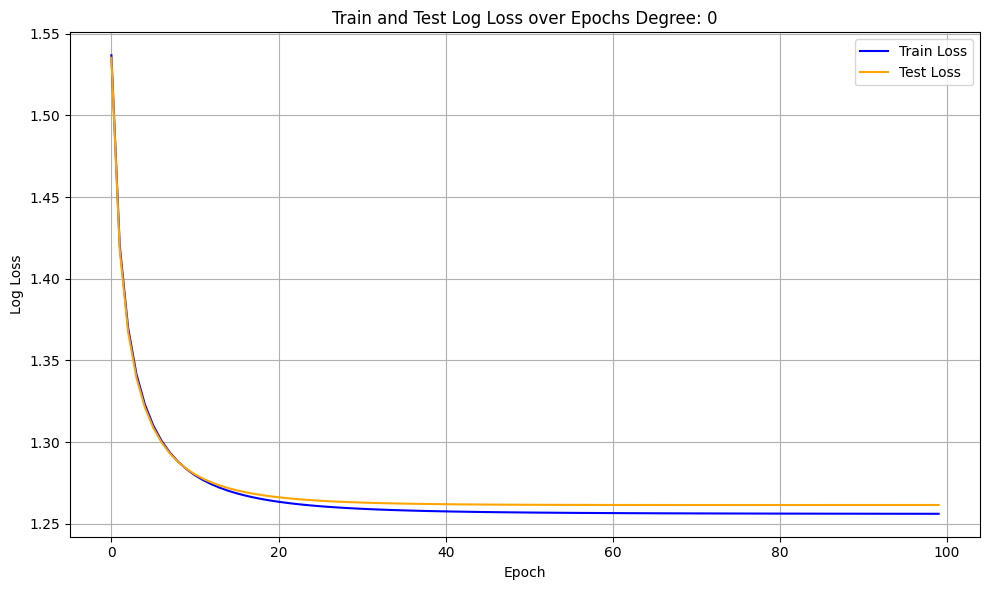

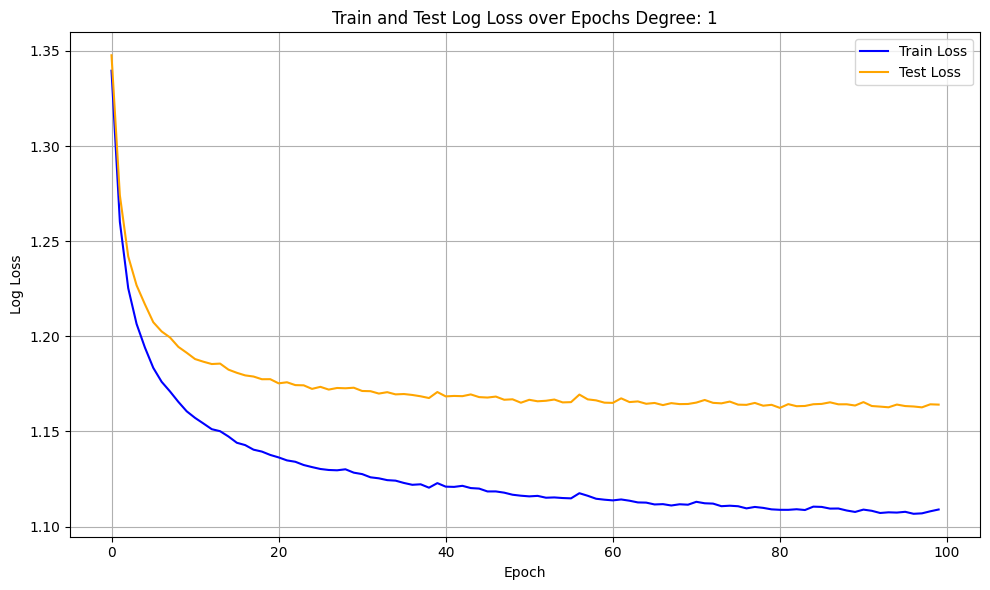

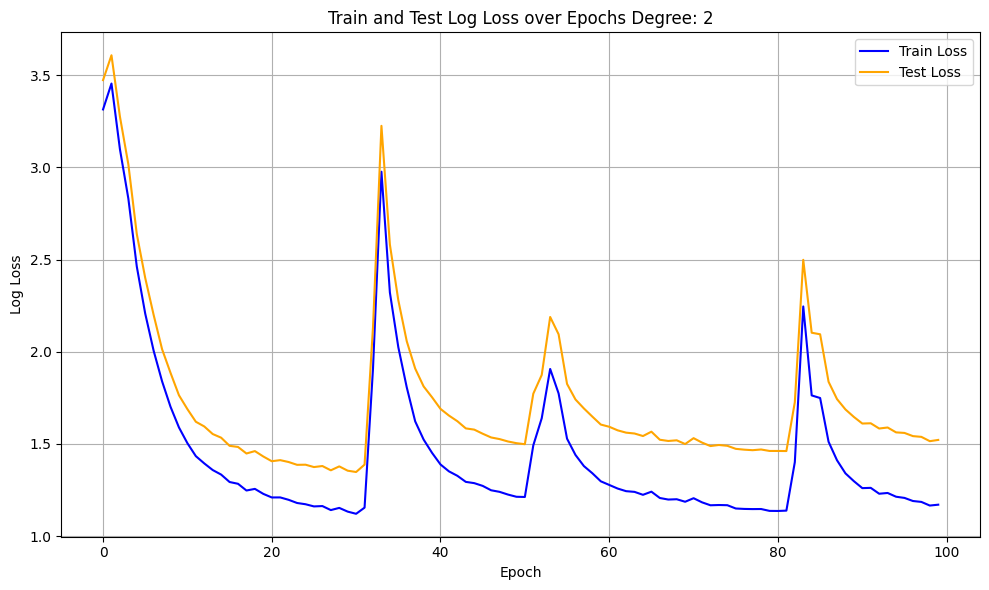

In [10]:
for idx, losses in enumerate(results):
    plot_loss_over_epoch(idx, losses[0], losses[1])